## Transfer Learning VGG 16 using Keras

In [116]:
!nvidia-smi

Sun Feb 25 05:41:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0              30W /  70W |    615MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [117]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)


2.15.0


In [118]:
# import the lib as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential

import numpy as np
from glob import glob

In [119]:
# mount the colabe with drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/DL/CNN/image_classification'

In [121]:
ROOT_PATH = r'/content/drive/MyDrive/Colab Notebooks/DL/CNN/image_classification'

In [122]:
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/DL/CNN/image_classification'

In [123]:
import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/drive/MyDrive/Colab Notebooks/DL/CNN/image_classification/catdog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 225MB/s]


'catdog.zip'

In [135]:
!unzip catdog.zip

Archive:  catdog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: train/Cat/

In [188]:
!ls

catdog.zip  image_classification.ipynb	train  validation


# model defining

In [189]:
# Set the path to your training and validation data
train_data_dir = 'train'
validation_data_dir = 'validation'

# Set the number of training and validation samples
num_train_samples = 2000
num_validation_samples = 800

# Set the number of epochs and batch size
epochs = 10
batch_size = 32
input_shape=(224, 224, 3)

In [190]:
# Load the VGG16 model without the top layer(layers before flattern)

base_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=False)

In [191]:
# Freeze the base model layers with prev setted weights
for layer in base_model.layers:
    layer.trainable = False


In [192]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [193]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [194]:
# creating model
model = Sequential()

# Add the base model as layers
model.add(base_model)

# Adding custom layers on top of base model layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [195]:
# view the structure of the model

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               6422784   
                                                                 
 dense_16 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [203]:
# model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [204]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [205]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 337 images belonging to 2 classes.


In [206]:
val_set = test_datagen.flow_from_directory(train_data_dir,
                                          target_size=(224, 224),
                                          batch_size=batch_size,
                                          class_mode='categorical'
)

Found 337 images belonging to 2 classes.


In [207]:
# model fitting

r = model.fit(training_set,
              validation_data=val_set,
              epochs=10,
              steps_per_epoch=len(training_set),
              validation_steps=len(val_set)
)

Epoch 1/10
11/11 [==============================] - 10s 770ms/step - loss: 4.1621 - accuracy: 0.4896 - val_loss: 1.3979 - val_accuracy: 0.4985
Epoch 2/10
11/11 [==============================] - 7s 688ms/step - loss: 0.8597 - accuracy: 0.5727 - val_loss: 0.3763 - val_accuracy: 0.8665
Epoch 3/10
11/11 [==============================] - 8s 672ms/step - loss: 0.4034 - accuracy: 0.8309 - val_loss: 0.3199 - val_accuracy: 0.8576
Epoch 4/10
11/11 [==============================] - 8s 753ms/step - loss: 0.2913 - accuracy: 0.9050 - val_loss: 0.2316 - val_accuracy: 0.9436
Epoch 5/10
11/11 [==============================] - 8s 773ms/step - loss: 0.2378 - accuracy: 0.9347 - val_loss: 0.1710 - val_accuracy: 0.9674
Epoch 6/10
11/11 [==============================] - 7s 646ms/step - loss: 0.1927 - accuracy: 0.9525 - val_loss: 0.1358 - val_accuracy: 0.9822
Epoch 7/10
11/11 [==============================] - 8s 803ms/step - loss: 0.1695 - accuracy: 0.9377 - val_loss: 0.1572 - val_accuracy: 0.9407
Epoch

In [208]:
import matplotlib.pyplot as plt

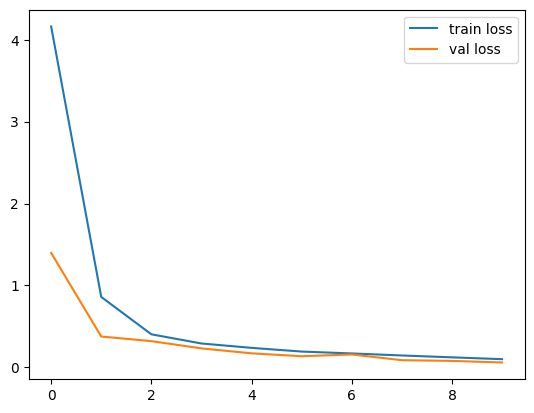

In [209]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

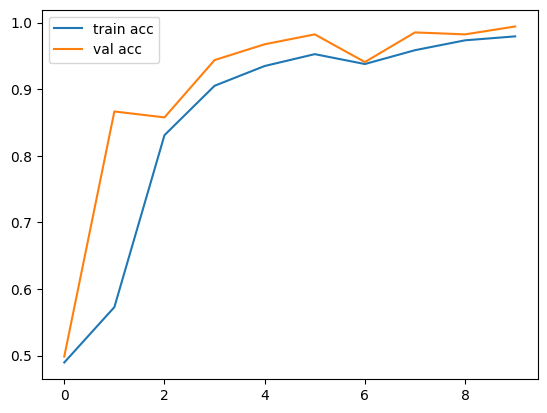

In [210]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [211]:
# save it as a h5 file

from keras.models import load_model

model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [213]:
y_pred = model.predict(training_set)

11/11 [==============================] - 6s 570ms/step


In [ ]:
y_pred

In [215]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)

In [216]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

## loading the model

In [217]:
model=load_model('model_vgg16.h5')

In [235]:
from keras.preprocessing import image
import numpy as np

# Specify the path to the image you want to test
img_path = "train/Cat/1.jpg"

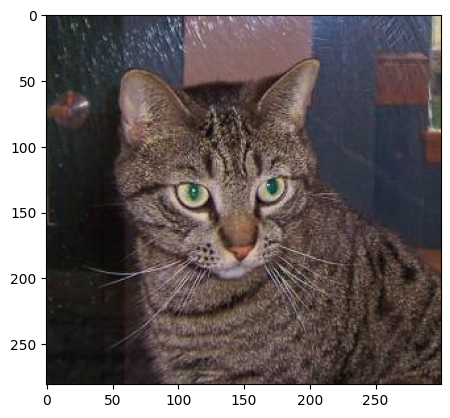

In [236]:
Z = plt.imread(img_path)
plt.imshow(Z)

In [238]:
# Load and preprocess the image
test_img = image.load_img(img_path, target_size=(224, 224))
test_img = image.img_to_array(test_img)

test_img = np.expand_dims(test_img, axis=0)

# Make a prediction using the loaded model
result = np.argmax(model.predict(test_img), axis=1)

# Print the result
if result == 0:
    print("The image is predicted as a Cat.")
else:
    print("The image is predicted as something other than Cat.")

1/1 [==============================] - 0s 26ms/step
The image is predicted as a Cat.


In [232]:
test_img.shape

(224, 224, 3)

In [233]:
test_img = test_img/255